## Logic Based FizzBuzz Function [Software 1.0]

In [201]:
def fizzbuzz(n):
    
    # if n is divisible by 3 and 5 we return the string FizBuzz
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    #if n is divisible by 3 only we return the string Fizz
    elif n % 3 == 0:
        return 'Fizz'
    #if n is divisible by 5 only we return the string Buzz
    elif n % 5 == 0:
        return 'Buzz'
    #if n is not divisible by 3 or 5 we return the string Other as default
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [202]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    '''
    We use lists in Python to store the data. Data can be of any type and so lists are helpful
    '''
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    '''
    We need some reference that the machine can use to learn. Without training data it would be impossible
    for a computer to predict something.
    '''
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    '''
    We use data frames because it aligns data neatly in the form of rows and columns. Making operations on an entire
    row and column is easy with data frames
    '''
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [203]:
def processData(dataset):
    
    # Why do we have to process?
    '''
    Here we preprocess the data to make sure it is in a language that the machine can understand. The data is converted
    to its binary format and the labels are also encoded in a way that will be explained below.
    '''
    data   = dataset['input'].values
    labels = dataset['label'].values
    '''
    Calls to methods to encode the data and labels
    '''
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [204]:
import numpy as np

def encodeData(data):
    
    processedData = []
    '''
    For each data point we perform a right shift and a logical AND to determine if a particular bit is set in its binary
    format. We do this 10 times because we have a little below 1000 numbers in our data set and to represent the nearest
    power of 2 with this number requires 10 bits(1024).
    '''
    for dataInstance in data:
        
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [205]:
def encodeLabel(labels):
    
    processedLabel = []
    
    '''
    We also encode the labels so that the computer can understand it. We encode it in a similar way to how the
    OneHotEncoder does (ie) each category will have a bit set on different columns.
    
    For example if there are three categories, the representation will look like:
    
    Category 1 - 0 0 1
    
    Category 2 - 0 1 0
    
    Category 3 - 1 0 0
    
    '''
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [206]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.optimizers import RMSprop,Adam

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 1024
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    '''
    We need a model to specify the configuration parameters such as the type of optimizer we require, the activation 
    function that we need etc.
    '''
    # Why use Dense layer and then activation?
    '''
    DENSE LAYER:
    Dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer. This forms 
    the basis of a neural network. Each neuron recieves input from all the neurons in the previous layer, 
    thus densely connected. 
    
    ACTIVATION:
    Essentially each neuron will not know the bounds of the values coming in and the goal of a neuron is to get 
    activated or not.To make this into a Yes (or) No decision for a neuron to fire we make use of the activation 
    function which brings the values between 0 and 1 (or) between -1 and 1 depending on the type of function we choose.
    Simply put, it converts the incoming values into a language that the neuron can understand.
    '''
    # Why use sequential model with layers?
    '''
    A model defines the relationship between features and labels.
    Sequential model helps us to provide a layer of neurons one after the other in the form of a sequence. If we 
    require mutliple levels of interconnected neurons the sequential model can help us by allowing us to keep 
    stacking a bunch of neuron layers one after the other.
    
    We use a dense layer to do the Wi*Xi (ie) multiply the input matrix by the weight vector. From the official 
    documentation:
    
    Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise 
    activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
    and bias is a bias vector created by the layer
    
    So, We can specify how we want to initialize the weights, it also allows us to specify the bias term
    (similar to an intercept of a straight line).
    
    
    '''
    model = Sequential()
    '''
    We add a level of neurons to do the processing for us. 
    '''
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    
    '''
    We use relu instead of functions like tanh and sigmoid because they have the vanishing gradient problem
    (ie) after a certain point if there are changes in the input, the output remains the same which means 
    network refuses to learn for any change in X
    '''
    model.add(Activation('relu'))
    
    # Why dropout?
    '''
    Dropout is ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at 
    random. Dropout is done to prevent over fitting (ie) drawing a curve that describes only the training data and 
    is useless at generalizing data. So unseen data which may be the test data might be incorrectly predicted.
    '''
    model.add(Dropout(drop_out))
    '''
    This is the output layer of neurons which is equal to the number of classes we have.
    '''
    model.add(Dense(second_dense_layer_nodes))
    # Why Softmax?
    '''
    The softmax function helps us to get a probability distribution where the class with a higher value will have high
    probability. Softmax helps to approximate which doesnt not force the minimum value to 0 making it differentiable.
    Softmax narrows down the range to bring it to between 0 and 1.
    
    '''
    model.add(Activation('softmax'))
    
    '''
    We get the list of configs we set for the model.
    '''
    model.summary()
    
    # Why use categorical_crossentropy?
    '''
    The cross entropy function is more suited to classification problems which have non linear functions. This is 
    chosen over mean_squared_error function which is used for regression problems and functions which have linearity.
    categorical_crossentropy is used to predict multiple mutually-exclusive classes.
    
    Cross entropy loss function is also called log loss which measures the performance of a classification model whose 
    output is a probability value between 0 and 1
    '''
    
    '''
    We use an Adam optimizer with a learning rate of 0.001.
    '''
    opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [207]:
# Create datafiles
'''
We create two seperate files one for training and one for testing
'''
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [208]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1024)              11264     
_________________________________________________________________
activation_47 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 4100      
_________________________________________________________________
activation_48 (Activation)   (None, 4)                 0         
Total params: 15,364
Trainable params: 15,364
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [209]:
#Parameters
'''
The validation data split specifies the split of training data between the training set and the cross validation set. 
For example if the training data size is 1000 then the model uses 750 inputs to train and 250 to validate.
'''
validation_data_split = 0.25
'''
The number of epochs determine how many times the data is passed on forward and backward. For each epoch the data is
passed forward and backward once.

Batch size determines the size of the batch to be processed. The entire data cannot be passed onto the neural network.
Decreasing the batch size will increase the time taken to learn.
'''
num_epochs = 1000
model_batch_size = 256
tb_batch_size = 6
'''
 It is the number of epochs with no improvement after which training will be stopped.
'''
early_patience = 100


'''
TensorBoard is a visualization tool provided with TensorFlow.
This callback writes a log for TensorBoard, which allows you to visualize graphs.


The Early stopping callback is kind of a monitoring tool which keeps on monitoring a value and stops if there is no 
improvement. Here we monitor the val_loss.
'''
tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
'''
We fit the model with the parameters we specified above.
'''
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 675 samples, validate on 225 samples
Epoch 1/1000
675/675 [==============================] - 0s 423us/step - loss: 1.3903 - acc: 0.2815 - val_loss: 1.2583 - val_acc: 0.5333
Epoch 2/1000
675/675 [==============================] - 0s 29us/step - loss: 1.2393 - acc: 0.5363 - val_loss: 1.1672 - val_acc: 0.5333
Epoch 3/1000
675/675 [==============================] - 0s 29us/step - loss: 1.1707 - acc: 0.5333 - val_loss: 1.1560 - val_acc: 0.5333
Epoch 4/1000
675/675 [==============================] - 0s 29us/step - loss: 1.1526 - acc: 0.5333 - val_loss: 1.1750 - val_acc: 0.5333
Epoch 5/1000
675/675 [==============================] - 0s 35us/step - loss: 1.1603 - acc: 0.5333 - val_loss: 1.1826 - val_acc: 0.5333
Epoch 6/1000
675/675 [==============================] - 0s 30us/step - loss: 1.1618 - acc: 0.5333 - val_loss: 1.1773 - val_acc: 0.5333
Epoch 7/1000
675/675 [==============================] - 0s 31us/step - loss: 1.1542 - acc: 0.5333 - val_loss: 1.1679 - val_acc: 0.5333
Epoch 8/

Epoch 61/1000
675/675 [==============================] - 0s 37us/step - loss: 1.0184 - acc: 0.5481 - val_loss: 1.1249 - val_acc: 0.5422
Epoch 62/1000
675/675 [==============================] - 0s 37us/step - loss: 1.0173 - acc: 0.5511 - val_loss: 1.1236 - val_acc: 0.5422
Epoch 63/1000
675/675 [==============================] - 0s 29us/step - loss: 1.0110 - acc: 0.5467 - val_loss: 1.1225 - val_acc: 0.5422
Epoch 64/1000
675/675 [==============================] - 0s 32us/step - loss: 1.0101 - acc: 0.5481 - val_loss: 1.1210 - val_acc: 0.5378
Epoch 65/1000
675/675 [==============================] - 0s 39us/step - loss: 1.0038 - acc: 0.5526 - val_loss: 1.1196 - val_acc: 0.5422
Epoch 66/1000
675/675 [==============================] - 0s 30us/step - loss: 0.9997 - acc: 0.5541 - val_loss: 1.1175 - val_acc: 0.5378
Epoch 67/1000
675/675 [==============================] - 0s 35us/step - loss: 0.9968 - acc: 0.5481 - val_loss: 1.1158 - val_acc: 0.5378
Epoch 68/1000
675/675 [=========================

675/675 [==============================] - 0s 21us/step - loss: 0.7495 - acc: 0.6696 - val_loss: 0.9971 - val_acc: 0.5689
Epoch 122/1000
675/675 [==============================] - 0s 21us/step - loss: 0.7380 - acc: 0.6904 - val_loss: 0.9939 - val_acc: 0.5733
Epoch 123/1000
675/675 [==============================] - 0s 23us/step - loss: 0.7401 - acc: 0.6933 - val_loss: 0.9915 - val_acc: 0.5644
Epoch 124/1000
675/675 [==============================] - 0s 23us/step - loss: 0.7287 - acc: 0.7067 - val_loss: 0.9902 - val_acc: 0.5733
Epoch 125/1000
675/675 [==============================] - 0s 24us/step - loss: 0.7263 - acc: 0.7007 - val_loss: 0.9888 - val_acc: 0.5733
Epoch 126/1000
675/675 [==============================] - 0s 22us/step - loss: 0.7220 - acc: 0.7244 - val_loss: 0.9879 - val_acc: 0.5822
Epoch 127/1000
675/675 [==============================] - 0s 23us/step - loss: 0.7168 - acc: 0.7215 - val_loss: 0.9836 - val_acc: 0.5733
Epoch 128/1000
675/675 [==============================] 

Epoch 181/1000
675/675 [==============================] - 0s 29us/step - loss: 0.4792 - acc: 0.9052 - val_loss: 0.8249 - val_acc: 0.6756
Epoch 182/1000
675/675 [==============================] - 0s 33us/step - loss: 0.4860 - acc: 0.8948 - val_loss: 0.8223 - val_acc: 0.6667
Epoch 183/1000
675/675 [==============================] - 0s 28us/step - loss: 0.4703 - acc: 0.8993 - val_loss: 0.8181 - val_acc: 0.6667
Epoch 184/1000
675/675 [==============================] - 0s 59us/step - loss: 0.4683 - acc: 0.8993 - val_loss: 0.8148 - val_acc: 0.6578
Epoch 185/1000
675/675 [==============================] - 0s 33us/step - loss: 0.4691 - acc: 0.9052 - val_loss: 0.8116 - val_acc: 0.6711
Epoch 186/1000
675/675 [==============================] - 0s 34us/step - loss: 0.4535 - acc: 0.9200 - val_loss: 0.8076 - val_acc: 0.6844
Epoch 187/1000
675/675 [==============================] - 0s 43us/step - loss: 0.4599 - acc: 0.9052 - val_loss: 0.8038 - val_acc: 0.7022
Epoch 188/1000
675/675 [=================

Epoch 241/1000
675/675 [==============================] - 0s 22us/step - loss: 0.3121 - acc: 0.9615 - val_loss: 0.6740 - val_acc: 0.7778
Epoch 242/1000
675/675 [==============================] - 0s 24us/step - loss: 0.3098 - acc: 0.9585 - val_loss: 0.6712 - val_acc: 0.7956
Epoch 243/1000
675/675 [==============================] - 0s 19us/step - loss: 0.3095 - acc: 0.9570 - val_loss: 0.6694 - val_acc: 0.8044
Epoch 244/1000
675/675 [==============================] - 0s 24us/step - loss: 0.3002 - acc: 0.9556 - val_loss: 0.6669 - val_acc: 0.8000
Epoch 245/1000
675/675 [==============================] - 0s 20us/step - loss: 0.2971 - acc: 0.9570 - val_loss: 0.6664 - val_acc: 0.7867
Epoch 246/1000
675/675 [==============================] - 0s 20us/step - loss: 0.3124 - acc: 0.9467 - val_loss: 0.6621 - val_acc: 0.7867
Epoch 247/1000
675/675 [==============================] - 0s 20us/step - loss: 0.3005 - acc: 0.9496 - val_loss: 0.6599 - val_acc: 0.7911
Epoch 248/1000
675/675 [=================

Epoch 301/1000
675/675 [==============================] - 0s 22us/step - loss: 0.2054 - acc: 0.9793 - val_loss: 0.5807 - val_acc: 0.8400
Epoch 302/1000
675/675 [==============================] - 0s 20us/step - loss: 0.2161 - acc: 0.9719 - val_loss: 0.5792 - val_acc: 0.8489
Epoch 303/1000
675/675 [==============================] - 0s 23us/step - loss: 0.2061 - acc: 0.9807 - val_loss: 0.5768 - val_acc: 0.8489
Epoch 304/1000
675/675 [==============================] - 0s 20us/step - loss: 0.2104 - acc: 0.9807 - val_loss: 0.5747 - val_acc: 0.8533
Epoch 305/1000
675/675 [==============================] - 0s 21us/step - loss: 0.2193 - acc: 0.9689 - val_loss: 0.5797 - val_acc: 0.8444
Epoch 306/1000
675/675 [==============================] - 0s 21us/step - loss: 0.2078 - acc: 0.9793 - val_loss: 0.5764 - val_acc: 0.8400
Epoch 307/1000
675/675 [==============================] - 0s 23us/step - loss: 0.2115 - acc: 0.9763 - val_loss: 0.5751 - val_acc: 0.8356
Epoch 308/1000
675/675 [=================

Epoch 361/1000
675/675 [==============================] - 0s 32us/step - loss: 0.1630 - acc: 0.9867 - val_loss: 0.5291 - val_acc: 0.8400
Epoch 362/1000
675/675 [==============================] - 0s 26us/step - loss: 0.1569 - acc: 0.9822 - val_loss: 0.5228 - val_acc: 0.8622
Epoch 363/1000
675/675 [==============================] - 0s 25us/step - loss: 0.1571 - acc: 0.9837 - val_loss: 0.5180 - val_acc: 0.8756
Epoch 364/1000
675/675 [==============================] - 0s 26us/step - loss: 0.1513 - acc: 0.9852 - val_loss: 0.5313 - val_acc: 0.8533
Epoch 365/1000
675/675 [==============================] - 0s 22us/step - loss: 0.1649 - acc: 0.9778 - val_loss: 0.5332 - val_acc: 0.8400
Epoch 366/1000
675/675 [==============================] - 0s 24us/step - loss: 0.1625 - acc: 0.9837 - val_loss: 0.5182 - val_acc: 0.8622
Epoch 367/1000
675/675 [==============================] - 0s 23us/step - loss: 0.1544 - acc: 0.9852 - val_loss: 0.5194 - val_acc: 0.8622
Epoch 368/1000
675/675 [=================

Epoch 421/1000
675/675 [==============================] - 0s 21us/step - loss: 0.1421 - acc: 0.9689 - val_loss: 0.4921 - val_acc: 0.8622
Epoch 422/1000
675/675 [==============================] - 0s 20us/step - loss: 0.1164 - acc: 0.9867 - val_loss: 0.4920 - val_acc: 0.8711
Epoch 423/1000
675/675 [==============================] - 0s 22us/step - loss: 0.1208 - acc: 0.9822 - val_loss: 0.4855 - val_acc: 0.8756
Epoch 424/1000
675/675 [==============================] - 0s 20us/step - loss: 0.1247 - acc: 0.9881 - val_loss: 0.4801 - val_acc: 0.8711
Epoch 425/1000
675/675 [==============================] - 0s 19us/step - loss: 0.1172 - acc: 0.9881 - val_loss: 0.4798 - val_acc: 0.8711
Epoch 426/1000
675/675 [==============================] - 0s 20us/step - loss: 0.1186 - acc: 0.9896 - val_loss: 0.4758 - val_acc: 0.8756
Epoch 427/1000
675/675 [==============================] - 0s 20us/step - loss: 0.1175 - acc: 0.9852 - val_loss: 0.4741 - val_acc: 0.8800
Epoch 428/1000
675/675 [=================

675/675 [==============================] - 0s 19us/step - loss: 0.0974 - acc: 0.9896 - val_loss: 0.4657 - val_acc: 0.8711
Epoch 481/1000
675/675 [==============================] - 0s 22us/step - loss: 0.1022 - acc: 0.9896 - val_loss: 0.4647 - val_acc: 0.8711
Epoch 482/1000
675/675 [==============================] - 0s 19us/step - loss: 0.1036 - acc: 0.9896 - val_loss: 0.4617 - val_acc: 0.8711
Epoch 483/1000
675/675 [==============================] - 0s 20us/step - loss: 0.1001 - acc: 0.9867 - val_loss: 0.4590 - val_acc: 0.8844
Epoch 484/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0917 - acc: 0.9926 - val_loss: 0.4609 - val_acc: 0.8800
Epoch 485/1000
675/675 [==============================] - 0s 20us/step - loss: 0.0964 - acc: 0.9911 - val_loss: 0.4714 - val_acc: 0.8667
Epoch 486/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0988 - acc: 0.9881 - val_loss: 0.4726 - val_acc: 0.8667
Epoch 487/1000
675/675 [==============================] 

Epoch 540/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0835 - acc: 0.9926 - val_loss: 0.4443 - val_acc: 0.8889
Epoch 541/1000
675/675 [==============================] - 0s 20us/step - loss: 0.0932 - acc: 0.9822 - val_loss: 0.4610 - val_acc: 0.8711
Epoch 542/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0779 - acc: 0.9896 - val_loss: 0.4442 - val_acc: 0.8711
Epoch 543/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0833 - acc: 0.9941 - val_loss: 0.4368 - val_acc: 0.8800
Epoch 544/1000
675/675 [==============================] - 0s 19us/step - loss: 0.0791 - acc: 0.9896 - val_loss: 0.4436 - val_acc: 0.8667
Epoch 545/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0912 - acc: 0.9926 - val_loss: 0.4497 - val_acc: 0.8622
Epoch 546/1000
675/675 [==============================] - 0s 20us/step - loss: 0.0843 - acc: 0.9896 - val_loss: 0.4491 - val_acc: 0.8578
Epoch 547/1000
675/675 [=================

Epoch 600/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0743 - acc: 0.9926 - val_loss: 0.4260 - val_acc: 0.8933
Epoch 601/1000
675/675 [==============================] - 0s 19us/step - loss: 0.0701 - acc: 0.9896 - val_loss: 0.4458 - val_acc: 0.8844
Epoch 602/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0727 - acc: 0.9911 - val_loss: 0.4310 - val_acc: 0.8889
Epoch 603/1000
675/675 [==============================] - 0s 20us/step - loss: 0.0613 - acc: 0.9970 - val_loss: 0.4214 - val_acc: 0.8756
Epoch 604/1000
675/675 [==============================] - 0s 19us/step - loss: 0.0791 - acc: 0.9926 - val_loss: 0.4220 - val_acc: 0.8844
Epoch 605/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0621 - acc: 0.9911 - val_loss: 0.4307 - val_acc: 0.8844
Epoch 606/1000
675/675 [==============================] - 0s 20us/step - loss: 0.0802 - acc: 0.9881 - val_loss: 0.4155 - val_acc: 0.8889
Epoch 607/1000
675/675 [=================

Epoch 660/1000
675/675 [==============================] - 0s 33us/step - loss: 0.0541 - acc: 0.9956 - val_loss: 0.4291 - val_acc: 0.8756
Epoch 661/1000
675/675 [==============================] - 0s 31us/step - loss: 0.0689 - acc: 0.9911 - val_loss: 0.4199 - val_acc: 0.8889
Epoch 662/1000
675/675 [==============================] - 0s 30us/step - loss: 0.0586 - acc: 0.9941 - val_loss: 0.4335 - val_acc: 0.8756
Epoch 663/1000
675/675 [==============================] - 0s 29us/step - loss: 0.0596 - acc: 0.9941 - val_loss: 0.4479 - val_acc: 0.8756
Epoch 664/1000
675/675 [==============================] - 0s 30us/step - loss: 0.0697 - acc: 0.9881 - val_loss: 0.4359 - val_acc: 0.8889
Epoch 665/1000
675/675 [==============================] - 0s 24us/step - loss: 0.0589 - acc: 0.9956 - val_loss: 0.4322 - val_acc: 0.8933
Epoch 666/1000
675/675 [==============================] - 0s 23us/step - loss: 0.0602 - acc: 0.9896 - val_loss: 0.4380 - val_acc: 0.8889
Epoch 667/1000
675/675 [=================

Epoch 720/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0568 - acc: 0.9941 - val_loss: 0.4366 - val_acc: 0.8844
Epoch 721/1000
675/675 [==============================] - 0s 23us/step - loss: 0.0585 - acc: 0.9926 - val_loss: 0.4313 - val_acc: 0.8889
Epoch 722/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0480 - acc: 0.9956 - val_loss: 0.4339 - val_acc: 0.8933
Epoch 723/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0455 - acc: 0.9985 - val_loss: 0.4332 - val_acc: 0.8933
Epoch 724/1000
675/675 [==============================] - 0s 23us/step - loss: 0.0658 - acc: 0.9896 - val_loss: 0.4257 - val_acc: 0.8978
Epoch 725/1000
675/675 [==============================] - 0s 24us/step - loss: 0.0500 - acc: 0.9970 - val_loss: 0.4304 - val_acc: 0.8933
Epoch 726/1000
675/675 [==============================] - 0s 23us/step - loss: 0.0671 - acc: 0.9867 - val_loss: 0.4426 - val_acc: 0.8711
Epoch 727/1000
675/675 [=================

Epoch 780/1000
675/675 [==============================] - 0s 23us/step - loss: 0.0557 - acc: 0.9926 - val_loss: 0.4132 - val_acc: 0.8933
Epoch 781/1000
675/675 [==============================] - 0s 24us/step - loss: 0.0518 - acc: 0.9896 - val_loss: 0.4197 - val_acc: 0.8933
Epoch 782/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0539 - acc: 0.9926 - val_loss: 0.4187 - val_acc: 0.8889
Epoch 783/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0545 - acc: 0.9926 - val_loss: 0.4313 - val_acc: 0.8844
Epoch 784/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0511 - acc: 0.9867 - val_loss: 0.4428 - val_acc: 0.8711
Epoch 785/1000
675/675 [==============================] - 0s 25us/step - loss: 0.0527 - acc: 0.9881 - val_loss: 0.4268 - val_acc: 0.8800
Epoch 786/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0516 - acc: 0.9926 - val_loss: 0.4228 - val_acc: 0.8756
Epoch 787/1000
675/675 [=================

Epoch 840/1000
675/675 [==============================] - 0s 23us/step - loss: 0.0436 - acc: 0.9941 - val_loss: 0.4310 - val_acc: 0.8756
Epoch 841/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0472 - acc: 0.9911 - val_loss: 0.4003 - val_acc: 0.9067
Epoch 842/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0388 - acc: 0.9970 - val_loss: 0.3983 - val_acc: 0.9067
Epoch 843/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0498 - acc: 0.9896 - val_loss: 0.4132 - val_acc: 0.8933
Epoch 844/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0401 - acc: 0.9985 - val_loss: 0.4151 - val_acc: 0.8933
Epoch 845/1000
675/675 [==============================] - 0s 21us/step - loss: 0.0452 - acc: 0.9896 - val_loss: 0.3952 - val_acc: 0.9067
Epoch 846/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0433 - acc: 0.9896 - val_loss: 0.3973 - val_acc: 0.9022
Epoch 847/1000
675/675 [=================

Epoch 900/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0367 - acc: 0.9970 - val_loss: 0.4361 - val_acc: 0.8800
Epoch 901/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0456 - acc: 0.9911 - val_loss: 0.4168 - val_acc: 0.8844
Epoch 902/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0379 - acc: 0.9956 - val_loss: 0.4060 - val_acc: 0.8933
Epoch 903/1000
675/675 [==============================] - 0s 24us/step - loss: 0.0422 - acc: 0.9970 - val_loss: 0.4064 - val_acc: 0.8889
Epoch 904/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0361 - acc: 0.9956 - val_loss: 0.4123 - val_acc: 0.8933
Epoch 905/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0473 - acc: 0.9896 - val_loss: 0.4248 - val_acc: 0.8844
Epoch 906/1000
675/675 [==============================] - 0s 22us/step - loss: 0.0367 - acc: 0.9970 - val_loss: 0.4162 - val_acc: 0.8889
Epoch 907/1000
675/675 [=================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c3c759748>,
      dtype=object)

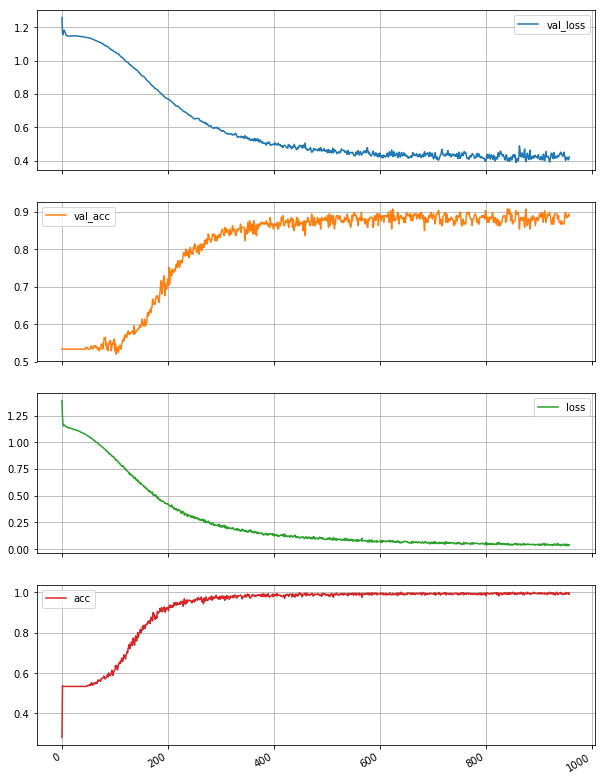

In [210]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [211]:
def decodeLabel(encodedLabel):
    '''
    This method does the decoding part (ie) the exact opposite of what encode method did.
    '''
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [212]:
wrong   = 0
right   = 0

'''
We read the testing data for the model to predict.
'''
testData = pd.read_csv('testing.csv')

'''
Following the same procedure we did as with training the data.(Pre-Processing)
'''
processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

'''
For all test data points we predict the output using the model we just built and learnt.
'''
for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    '''
    We find out which class has the maximum value
    '''
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "vharisha")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50291399")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")
'''
We concatenate all the data we just obtained and we put it in a csv file using the pandas library.
'''
output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 2  Correct :98
Testing Accuracy: 98.0
